# Сессия 1

### 1.1 Парсинг данных

На основании файла owid-covid-data.csv репозитория https://github.com/owid, содержащего
статистические данные об эпидемиологической ситуации в различных странах, необходимо
построить исходный набор данных. Набор данных должен быть загружен непосредственно из
репозитория и включать все необходимые атрибуты. Можно дополнить набор какими-либо
другими данными, если они могут быть полезны для дальнейшего исследования.

In [1]:
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Находим репозиторий с нужным csv файлом и считываем его в dataframe

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

In [3]:
print(df.shape)
df.head(10)

(373495, 67)


iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          NaN        0.0   
5      AFG      Asia  Afghanistan  2020-01-10          NaN        0.0   
6      AFG      Asia  Afghanistan  2020-01-11          NaN        0.0   
7      AFG      Asia  Afghanistan  2020-01-12          NaN        0.0   
8      AFG      Asia  Afghanistan  2020-01-13          NaN        0.0   
9      AFG      Asia  Afghanistan  2020-01-14          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   
5                 0.0           NaN         0.0                  0.0  ...   
6                 0.0           NaN         0.0                  0.0  ...   
7                 0.0           NaN         0.0                  0.0  ...   
8                 0.0           NaN         0.0                  0.0  ...   
9                 0.0           NaN         0.0                  0.0  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN                  37.746                         0.5   
1           NaN                  37.746                         0.5   
2           NaN                  37.746                         0.5   
3           NaN                  37.746                         0.5   
4           NaN                  37.746                         0.5   
5           NaN                  37.746                         0.5   
6           NaN                  37.746                         0.5   
7           NaN                  37.746                         0.5   
8           NaN                  37.746                         0.5   
9           NaN                  37.746                         0.5   

   life_expectancy  human_development_index  population  \
0            64.83                    0.511  41128772.0   
1            64.83                    0.511  41128772.0   
2            64.83                    0.511  41128772.0   
3            64.83                    0.511  41128772.0   
4            64.83                    0.511  41128772.0   
5            64.83                    0.511  41128772.0   
6            64.83                    0.511  41128772.0   
7            64.83                    0.511  41128772.0   
8            64.83                    0.511  41128772.0   
9            64.83                    0.511  41128772.0   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   
5                                   NaN                          NaN   
6                                   NaN                          NaN   
7                                   NaN                          NaN   
8                                   NaN                          NaN   
9                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  

Итого мы имеем структуру данных о заражённых в разных странах и городах. В таблице имеется 373437 строк данных и 67 признаков.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373495 entries, 0 to 373494
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    373495 non-null  object 
 1   continent                                   355619 non-null  object 
 2   location                                    373495 non-null  object 
 3   date                                        373495 non-null  object 
 4   total_cases                                 334669 non-null  float64
 5   new_cases                                   362728 non-null  float64
 6   new_cases_smoothed                          361498 non-null  float64
 7   total_deaths                                312781 non-null  float64
 8   new_deaths                                  362736 non-null  float64
 9   new_deaths_smoothed                         361506 non-null  float64
 

Просмоторев информацию о dataframe, можно увидеть, что в некоторых столбцах пропущенно множество значений, далее просмотрим каких значений сличком мало и будем либо заполнять пропущеные значения, либо исключать признаки из выборки. Имеется 5 признака типа object, остальные 62 признака имееют тип float64, что упростит работу с данными, так как не нужно преобразовывать типы.

### 1.2 Предобработка данных и выделение значимых атрибутов

Задача диагностики эпидемиологической ситуации заключается в определении класса
(кластера) – уровня опасности для туриста. Уровень опасности определяется тремя уровнями:
зеленый — безопасно, желтый — средний уровень опасности и красный — посещение опасно.
Исходя из этого, необходимо определить, какие атрибуты имеют наибольшее влияние на
определение таких классов (кластеров), и оставить только их для последующего обучения.
Также необходимо обосновать выбор дополнительных атрибутов и причину исключения какихлибо данных из исходного набора документов.



In [5]:
# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)
# Ограничения на количестов знаков после запятой
pd.set_option("display.precision", 2)

data = pd.DataFrame()

data.index =  df.columns
data['count_NaN'] = df.isna().sum()
data['prosent_NaN']= (df.isna().sum()/df.shape[0])*100
data['dtypes'] = df.dtypes
data['uniq'] = df.nunique()
data['repeat'] = df.shape[0] - data['uniq']
data['shape'] = df.shape[0]
data

count_NaN  prosent_NaN   dtypes  \
iso_code                                            0         0.00   object   
continent                                       17876         4.79   object   
location                                            0         0.00   object   
date                                                0         0.00   object   
total_cases                                     38826        10.40  float64   
new_cases                                       10767         2.88  float64   
new_cases_smoothed                              11997         3.21  float64   
total_deaths                                    60714        16.26  float64   
new_deaths                                      10759         2.88  float64   
new_deaths_smoothed                             11989         3.21  float64   
total_cases_per_million                         38826        10.40  float64   
new_cases_per_million                           10767         2.88  float64   
new_cases_smoothed_per_million                  11997         3.21  float64   
total_deaths_per_million                        60714        16.26  float64   
new_deaths_per_million                          10759         2.88  float64   
new_deaths_smoothed_per_million                 11989         3.21  float64   
reproduction_rate                              188678        50.52  float64   
icu_patients                                   335173        89.74  float64   
icu_patients_per_million                       335173        89.74  float64   
hosp_patients                                  333691        89.34  float64   
hosp_patients_per_million                      333691        89.34  float64   
weekly_icu_admissions                          362955        97.18  float64   
weekly_icu_admissions_per_million              362955        97.18  float64   
weekly_hosp_admissions                         349591        93.60  float64   
weekly_hosp_admissions_per_million             349591        93.60  float64   
total_tests                                    294108        78.74  float64   
new_tests                                      298092        79.81  float64   
total_tests_per_thousand                       294108        78.74  float64   
new_tests_per_thousand                         298092        79.81  float64   
new_tests_smoothed                             269530        72.16  float64   
new_tests_smoothed_per_thousand                269530        72.16  float64   
positive_rate                                  277568        74.32  float64   
tests_per_case                                 279147        74.74  float64   
tests_units                                    266707        71.41   object   
total_vaccinations                             291135        77.95  float64   
people_vaccinated                              295127        79.02  float64   
people_fully_vaccinated                        298300        79.87  float64   
total_boosters                                 323021        86.49  float64   
new_vaccinations                               305309        81.74  float64   
new_vaccinations_smoothed                      184745        49.46  float64   
total_vaccinations_per_hundred                 291135        77.95  float64   
people_vaccinated_per_hundred                  295127        79.02  float64   
people_fully_vaccinated_per_hundred            298300        79.87  float64   
total_boosters_per_hundred                     323021        86.49  float64   
new_vaccinations_smoothed_per_million          184745        49.46  float64   
new_people_vaccinated_smoothed                 187166        50.11  float64   
new_people_vaccinated_smoothed_per_hundred     187166        50.11  float64   
stringency_index                               176203        47.18  float64   
population_density                              56172        15.04  float64   
median_age                                      78471        21.01  float64   
aged_65_older  

Множество признаков с огромным процентом пустых значений, их использовать не будем, так как, если их не заполнили значит эта данные которые не обязательны к заполнению, либо их просто не собирали. Далее выделим признаки больше 75% пропусков, и проанализируем их.



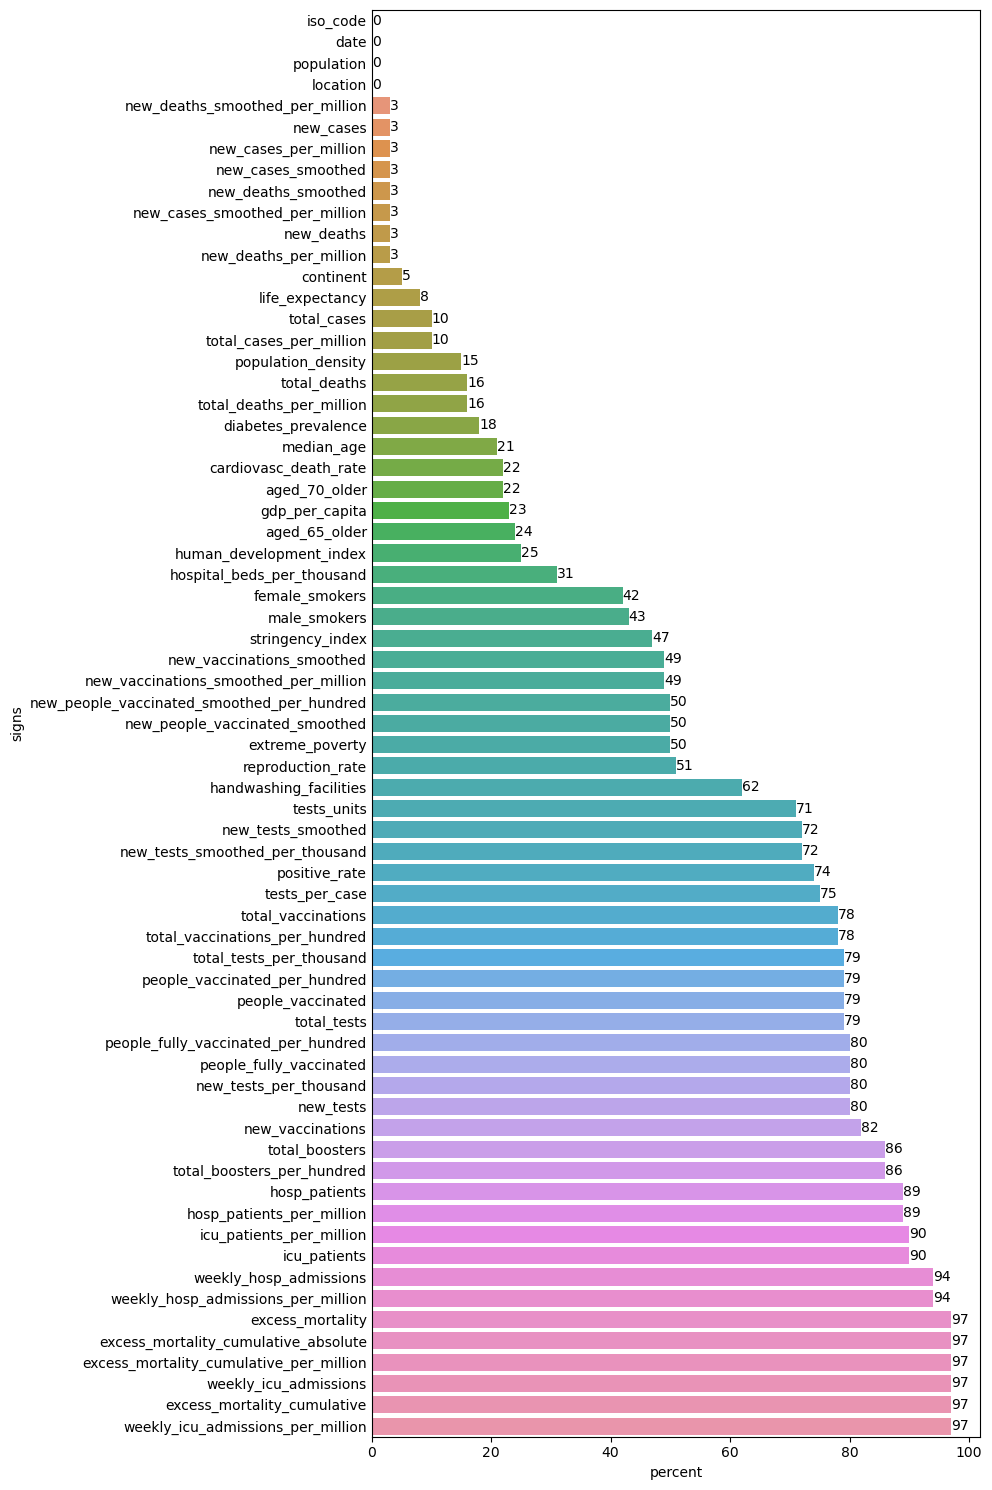

In [14]:
data_nan = pd.DataFrame()

# Датафрейм для просмотра пустых значений
columns = df.columns
data_nan.index = columns
data_nan['signs'] = columns
data_nan['percent'] = round((df.isna().sum()/df.shape[0])*100, 0)

plt.figure(figsize=(10, 15))
ax = sns.barplot(data=data_nan, y='signs', x='percent', 
                 order=data_nan.groupby('signs')['percent'].agg('mean').sort_values(ascending=True).index )
ax.tick_params(axis='y', length=0)
for i in ax.containers:
    ax.bar_label(i,)
    
plt.tight_layout()
plt.show()


На графике можно увидеть признаки и процент пустых значений в них. Наблюдаются признаки с 75ю и более процентами пропусков, возможно эти признаки записывались как необязательные, либо эти данные были просто не известны.

In [6]:
need_signs = list(df.columns)

print('Признаки с процентом от 75%:' )
sum = 0
for i in data[data['prosent_NaN'] >= 75].index:
    sum+=1
    print('\t' + i)
    need_signs.remove(i)
print(f'Итого {sum} признаков.')

Признаки с процентом от 75%:
	icu_patients
	icu_patients_per_million
	hosp_patients
	hosp_patients_per_million
	weekly_icu_admissions
	weekly_icu_admissions_per_million
	weekly_hosp_admissions
	weekly_hosp_admissions_per_million
	total_tests
	new_tests
	total_tests_per_thousand
	new_tests_per_thousand
	total_vaccinations
	people_vaccinated
	people_fully_vaccinated
	total_boosters
	new_vaccinations
	total_vaccinations_per_hundred
	people_vaccinated_per_hundred
	people_fully_vaccinated_per_hundred
	total_boosters_per_hundred
	excess_mortality_cumulative_absolute
	excess_mortality_cumulative
	excess_mortality
	excess_mortality_cumulative_per_million
Итого 25 признаков.


У данных признаков большое количесвто пропущенных значений, мы не сможем их заменить средним, ну и так как их не заполнили на наши кластеры они влиять не будут. Поэтому данные признаки в выбрку включать не будем. 
Сами признаки:

8 признаков связанных с людьми попавших в больницу из-за covid-19. Так как нас интерусует уровень опасности, а не статистика лечения, эти данные нам не нужны.

4 признака связанных с тестами на болезнь, так же нас не интересуют.

9 признаков связанных с вакцинацией, так как здесь нет информаций о вырдоравевших людях, эти столбцы нам так же не важны

4 признака о реальном количесве смертей и прогназируемом количесве на 2020 год, нам так же не нужно, нас интерисует текущая ситуация.

<AxesSubplot:>

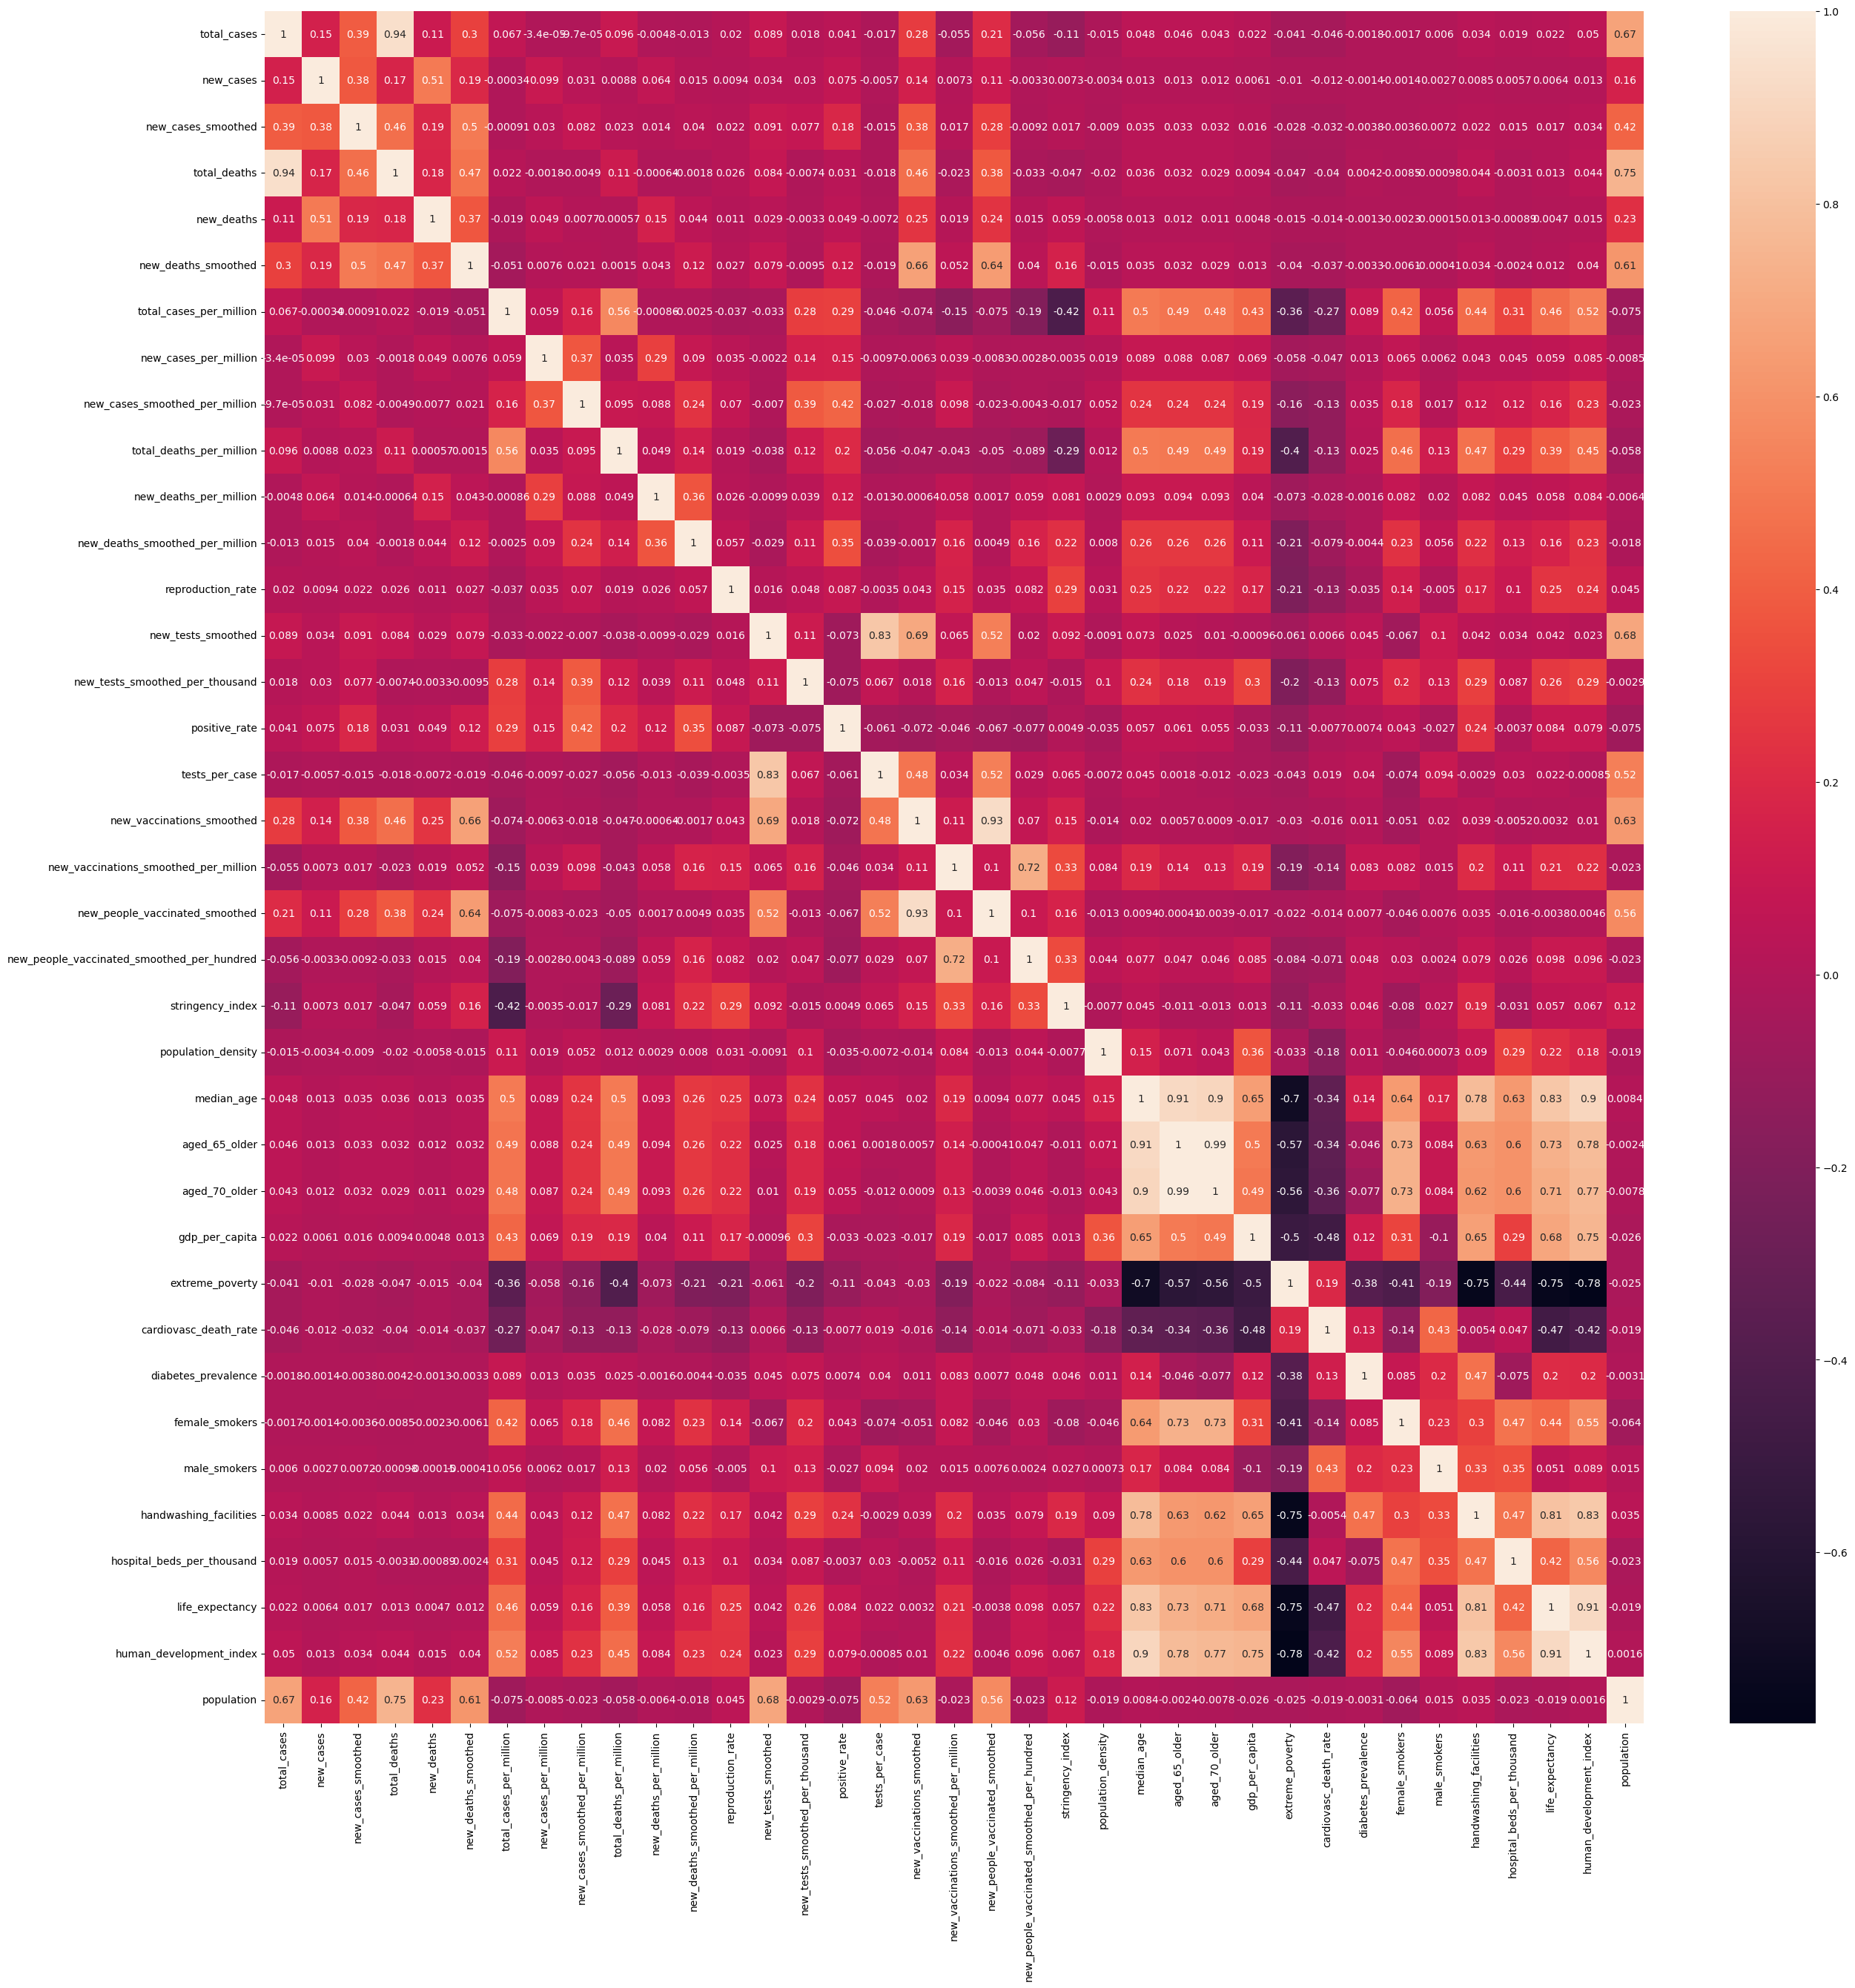

In [7]:
plt.figure(figsize=(30, 30))
sns.heatmap(df[need_signs].corr(), annot = True)

Есть множество хорошо коррелирующих признаков, к примеру 0.94 у total_cases(общее количество случаев заражений) и total_deaths(общее количество смертей), и это нормальная корреляция, так как логично чем больше заражений тем больше смертей. Но так же можно увидеть корреляцию в 0.99 у признаков aged_65_older и aged_70_older причём в описаний дано понять что люди старше 70ти собраны за 2015 год, нам эти данные не нужны, поэту исключим этот признак и избежим мультиколинеарности.

In [8]:
need_signs.remove('aged_70_older')

Так же исключим данные о локациях и времени, так как в будущем нам нужна общая оценка опасности по локациям и датам, следовательно они не должны входить в выборку.

In [9]:
need_signs.remove('iso_code')
need_signs.remove('continent')
need_signs.remove('location')
need_signs.remove('date')

Признаки: cardiovasc_death_rate(уровень смертности от сердечно-сосудистых заболеваний в 2017 году), diabetes_prevalence(распространенность сахарного диабета в 2017 году), life_expectancy(ожидаемая продолжительность жизни при рождении в 2019 году) так же являются бесполезными для измерения опасности, их так же не следует включать в выборку.

In [10]:
need_signs.remove('cardiovasc_death_rate')
need_signs.remove('diabetes_prevalence')
need_signs.remove('life_expectancy')

<AxesSubplot:>

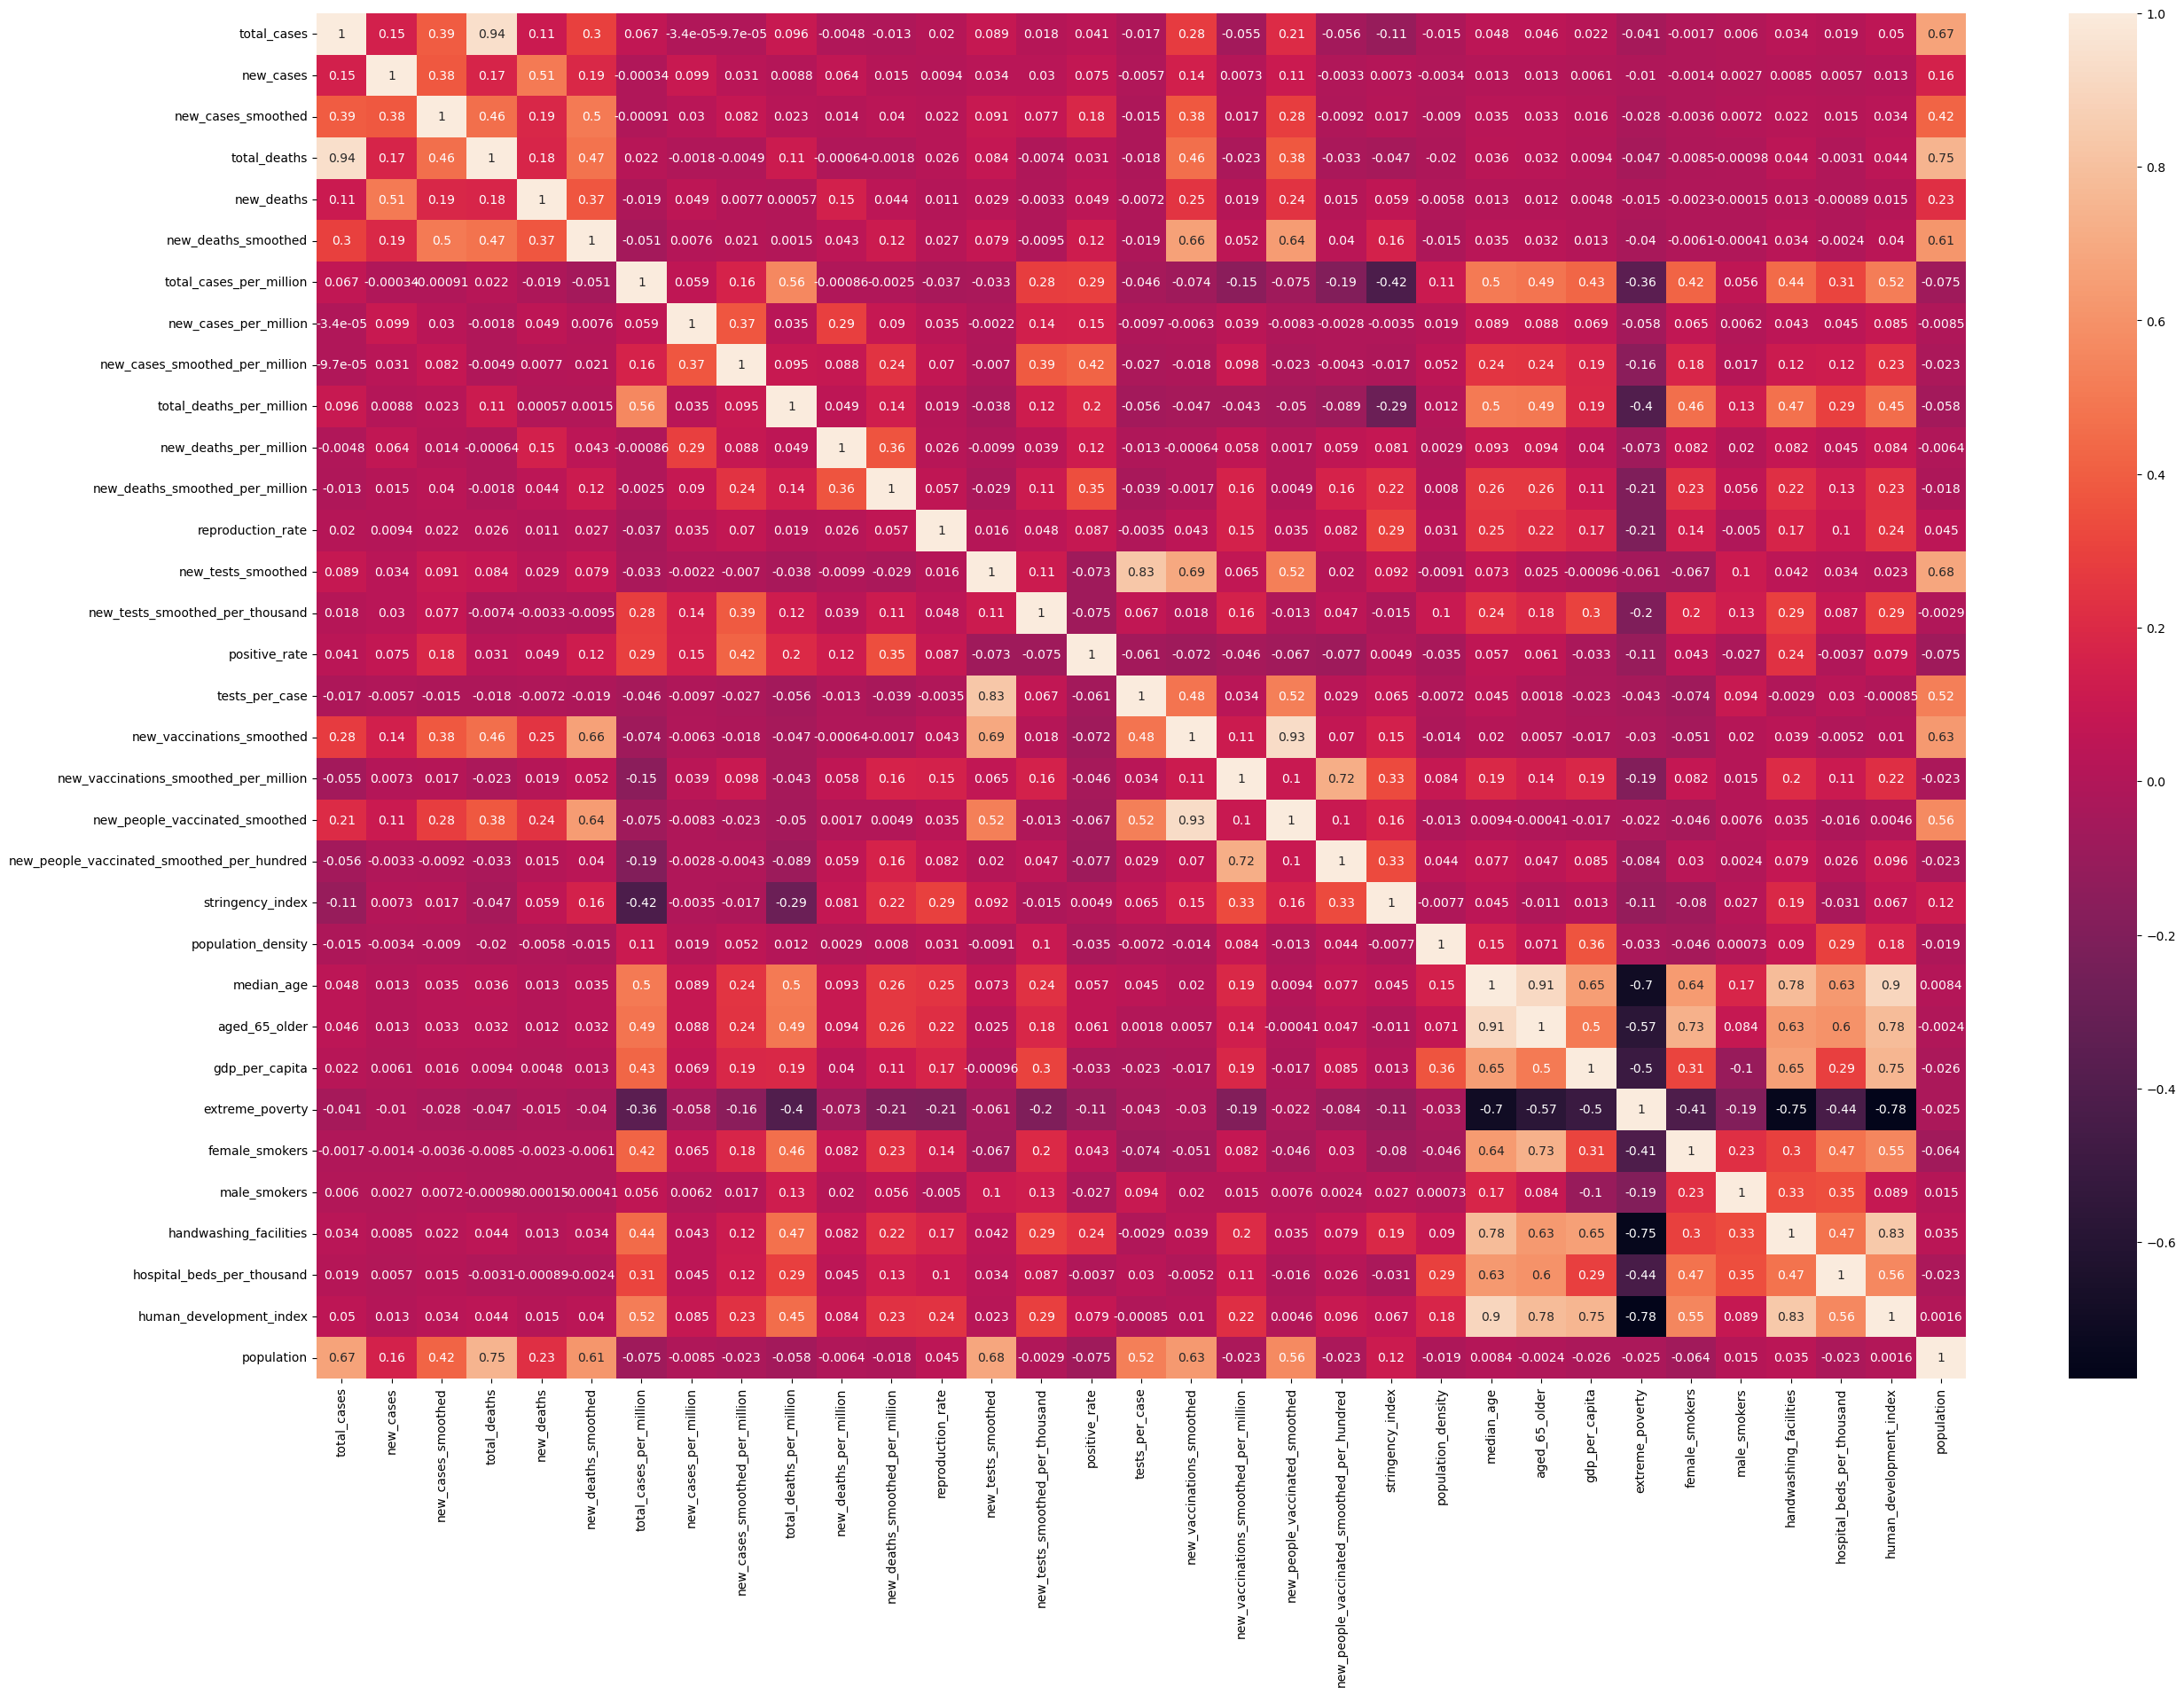

In [11]:
plt.figure(figsize=(30, 20))
sns.heatmap(df[need_signs].corr(), annot = True)

In [12]:
print(len(need_signs))
need_signs

34


['total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'new_vaccinations_smoothed',
 'new_vaccinations_smoothed_per_million',
 'new_people_vaccinated_smoothed',
 'new_people_vaccinated_smoothed_per_hundred',
 'stringency_index',
 'population_density',
 'median_age',
 'aged_65_older',
 'gdp_per_capita',
 'extreme_poverty',
 'female_smokers',
 'male_smokers',
 'handwashing_facilities',
 'hospital_beds_per_thousand',
 'human_development_index',
 'population']

В итоге мы оставляем в выборке 34 признака, путём отбора принаков которые логичестки подходят под заданное условие, которые имееют достаточное количество данных, и так же которые не будут создавать помехи(из-за мультиколлинеарности) для класстеризаций.

### 1.3 Описание структуры набора данных

Для каждого атрибута подготовьте описание, содержащее текстовое представление
(расшифровка, перевод, назначение) и статистику распределения данных (плотность, наличие
пустых значений).


#### Подтверждённые случай
__total_cases__ -	Общее количество подтвержденных случаев COVID-19. Подсчеты могут включать вероятные случаи, о которых сообщалось.

__new_cases__	Новые подтвержденные случаи COVID-19. Подсчет может включать вероятные случаи, о которых сообщалось. В редких случаях, когда наш источник сообщает о негативном ежедневном изменении из-за корректировки данных, мы устанавливаем для этого показателя значение NA.

__new_cases_smoothed__	Новые подтвержденные случаи COVID-19 (сглажены за 7 дней). Подсчеты могут включать вероятные случаи, о которых сообщалось.

__total_cases_per_million__	Общее количество подтвержденных случаев COVID-19 на 1 000 000 человек. Подсчеты могут включать вероятные случаи, о которых сообщается.

__new_cases_per_million__	Новые подтвержденные случаи COVID-19 на 1 000 000 человек. Подсчеты могут включать вероятные случаи, о которых сообщалось.

__new_cases_smoothed_per_million__	Новые подтвержденные случаи COVID-19 (сглаженные за 7 дней) на 1 000 000 человек. Подсчеты могут включать вероятные случаи, о которых сообщалось.

#### Подтверждённые случай смерти

__total_deaths__	Общее количество смертей, связанных с COVID-19. Подсчеты могут включать вероятные смерти, если о них сообщается.

__new_deaths__	Новые случаи смерти, связанные с COVID-19. Подсчет может включать вероятные случаи смерти, о которых сообщалось. В редких случаях, когда наш источник сообщает о отрицательном ежедневном изменении из-за корректировки данных, мы устанавливаем этот показатель равным NA.

__new_deaths_smoothed__	Новые случаи смерти, связанные с COVID-19 (сглажены за 7 дней). Подсчеты могут включать вероятные случаи смерти, если о них сообщается.

__total_deaths_per_million__	Общее количество смертей, связанных с COVID-19, на 1 000 000 человек. Подсчеты могут включать вероятные смерти, если о них сообщается.

__new_deaths_per_million__	Новые случаи смерти, связанные с COVID-19, на 1 000 000 человек. Подсчеты могут включать вероятные случаи смерти, если о них сообщается.

__new_deaths_smoothed_per_million__	Новые случаи смерти, связанные с COVID-19 (сглаженные за 7 дней) на 1 000 000 человек. Подсчеты могут включать вероятные случаи смерти, если о них сообщается.

#### Избыточная смертность

__excess_mortality__	Процентная разница между зарегистрированным количеством еженедельных или ежемесячных смертей в 2020-2021 годах и прогнозируемым количеством смертей за тот же период на основе предыдущих лет. Для получения дополнительной информации см. https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality

__excess_mortality_cumulative__	Процентная разница между совокупным числом смертей с 1 января 2020 года и совокупным прогнозируемым числом смертей за тот же период на основе предыдущих лет. Для получения дополнительной информации см. https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality

__excess_mortality_cumulative_absolute__	Совокупная разница между зарегистрированным числом смертей с 1 января 2020 года и прогнозируемым числом смертей за тот же период на основе предыдущих лет. Для получения дополнительной информации см. https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality

__excess_mortality_cumulative_per_million__	Совокупная разница между зарегистрированным числом смертей с 1 января 2020 года и прогнозируемым числом смертей за тот же период на основе предыдущих лет, на миллион человек. Для получения дополнительной информации см. https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality

#### Больница и отделение интенсивной терапии

__icu_patients__	Количество пациентов с COVID -19 в отделениях интенсивной терапии (ОРИТ) за определенный день

__icu_patients_per_million__	Количество пациентов с COVID -19 в отделениях интенсивной терапии (ОРИТ) в данный день на 1 000 000 человек

__hosp_patients____	Количество пациентов с COVID-19 в больнице в данный день

__hosp_patients_per_million__	Количество пациентов с COVID-19 в больнице в данный день на 1 000 000 человек

__weekly_icu_admissions__	Количество пациентов с COVID -19, вновь поступивших в отделения интенсивной терапии (ОРИТ) за данную неделю (отчетная дата и предшествующие 6 дней)

__weekly_icu_admissions_per_million__	Количество пациентов с COVID -19, вновь поступивших в отделения интенсивной терапии (ОРИТ) за данную неделю на 1 000 000 человек (отчетная дата и предшествующие 6 дней)

__weekly_hosp_admissions__	Количество пациентов с COVID -19, вновь поступивших в больницы за данную неделю (отчетная дата и предшествующие 6 дней)

__weekly_hosp_admissions_per_million__	Количество пациентов с COVID -19, вновь поступивших в больницы за данную неделю на 1 000 000 человек (отчетная дата и предшествующие 6 дней)

#### Реагирование правительства

__stringency_index__	Индекс строгости реагирования правительства: сводный показатель, основанный на 9 показателях реагирования, включая закрытие школ, рабочих мест и запреты на поездки, масштабированный до значения от 0 до 100 (100 = самый строгий ответ)

#### Скорость воспроизведения

__reproduction_rate__	Оценка эффективного коэффициента размножения (R) COVID-19 в режиме реального времени. Посмотреть https://github.com/crondonm/TrackingR/tree/main/Estimates-Database

#### Тесты и положительный результат

__total_tests__	Общее количество тестов на COVID-19

__new_tests__	Новые тесты на COVID-19 (рассчитываются только для последовательных дней)

__total_tests_per_thousand__	Общее количество тестов на COVID-19 на 1000 человек

__new_tests_per_thousand__	Новые тесты на COVID-19 на 1000 человек

__new_tests_smoothed__	Новые тесты на COVID-19 (сглажены за 7 дней). Для стран, которые не сообщают данные тестирования на ежедневной основе, мы предполагаем, что данные тестирования менялись одинаково на ежедневной основе в течение всех периодов, за которые данные не сообщались. В результате получается полный ряд ежедневных показателей, которые затем усредняются в течение 7-дневного периода

__new_tests_smoothed_per_thousand__	Новые тесты на COVID-19 (сглаженные за 7 дней) на 1000 человек

__positive_rate___	Доля положительных тестов на COVID -19, приведенная в виде скользящего среднего значения за 7 дней (это обратная величина для tests_per_case)

__tests_per_case__	Тесты, проводимые для каждого нового подтвержденного случая COVID-19, приведены в виде скользящего среднего значения за 7 дней (это величина, обратная показателю positive_rate)

__tests_units__	Единицы измерения, используемые местоположением для представления данных тестирования. Файл страны не может содержать смешанных единиц измерения. Все показатели, касающиеся данных тестирования, используют указанную единицу измерения. Допустимыми единицами измерения являются "протестированные люди" (количество протестированных людей), "выполненные тесты" (количество выполненных тестов. один человек может пройти тестирование более одного раза в день) и "протестированные образцы" (количество протестированных образцов. В некоторых случаях для выполнения одного теста может потребоваться более одного образца.)

#### Вакцинации

__total_vaccinations__	Общее количество введенных доз вакцинации против COVID-19

__people_vaccinated__	Общее число людей, получивших хотя бы одну дозу вакцины

__people_fully_vaccinated__	Общее количество людей, получивших все дозы, предписанные протоколом первоначальной вакцинации

__total_boosters__	Общее количество введенных бустерных доз вакцинации против COVID -19 (дозы, введенные сверх количества, предписанного протоколом вакцинации)

__new_vaccinations__	Введены новые дозы вакцинации против COVID-19 (рассчитываются только для последовательных дней)

__new_vaccinations_smoothed__	Введены новые дозы вакцинации против COVID-19 (скорректированы на 7-дневный период). Для стран, которые не сообщают данные о вакцинации на ежедневной основе, мы предполагаем, что вакцинация менялась одинаково на ежедневной основе за все периоды, за которые данные не сообщались. В результате получается полный ряд ежедневных показателей, которые затем усредняются в течение 7-дневного периода

__total_vaccinations_per_hundred__	Общее количество введенных доз вакцинации против COVID-19 на 100 человек в общей популяции

__people_vaccinated_per_hundred__	Общее количество людей, получивших хотя бы одну дозу вакцины на 100 человек в общей популяции

__people_fully_vaccinated_per_hundred__	Общее количество людей, получивших все дозы, предписанные протоколом первичной вакцинации, на 100 человек в общей численности населения

__total_boosters_per_hundred__	Общее количество введенных бустерных доз вакцинации против COVID-19 на 100 человек в общей популяции

__new_vaccinations_smoothed_per_million__	Вводятся новые дозы вакцинации против COVID-19 (скорректированные за 7 дней) на 1 000 000 человек в общей численности населения

__new_people_vaccinated_smoothed__	Ежедневное количество людей, получающих первую дозу вакцины (с учетом 7-дневного периода)

__new_people_vaccinated_smoothed_per_hundred__	Ежедневное количество людей, получающих первую дозу вакцины (с учетом 7-дневного периода) на 100 человек в общей численности населения


#### Прочее

__iso_code__	ISO 3166-1 alpha-3 - трехбуквенные коды стран. Обратите внимание, что регионы, определенные OWID (например, континенты, такие как "Европа"), содержат префикс "OWID_".

__continent__	Континент географического расположения

__location__	Географическое положение

__date__	Дата наблюдения

__population__	Численность населения (последние доступные значения). Полный список источников см. https://github.com/owid/covid-19-data/blob/master/scripts/input/un/population_latest.csv

__population_density__	Количество людей в разбивке по площади земли, измеряемое в квадратных километрах, доступно за последний год

__median_age__	Средний возраст населения, прогноз ООН на 2020 год

__aged_65_older__	Доля населения в возрасте 65 лет и старше, последний доступный год

__aged_70_older__	Доля населения в возрасте 70 лет и старше в 2015 году

__gdp_per_capita__	Валовой внутренний продукт по паритету покупательной способности (постоянные международные доллары 2011 года), доступен последний год

__extreme_poverty__	Доля населения, живущего в крайней бедности, последний доступный год с 2010 года

__cardiovasc_death_rate__	Уровень смертности от сердечно-сосудистых заболеваний в 2017 году (ежегодное число смертей на 100 000 человек)

__diabetes_prevalence____	Распространенность сахарного диабета (% населения в возрасте от 20 до 79 лет) в 2017 году

__female_smokers__	Доля курящих женщин, данные за последний год

__male_smokers__	Доля курящих мужчин, данные за последний год

__handwashing_facilities__	Доля населения, имеющего базовые средства для мытья рук в помещениях, по данным за последний год

__hospital_beds_per_thousand__	Количество больничных коек на 1000 человек, последний доступный год с 2010 года

__life_expectancy__	Ожидаемая продолжительность жизни при рождении в 2019 году

__human_development_index__	Сводный индекс, измеряющий средние достижения в трех основных измерениях человеческого развития — долгой и здоровой жизни, знаниях и достойном уровне жизни. Значения на 2019 год, импортированы из http://hdr.undp.org/en/indicators/137506

Многие признаки относятся к медицинским показаниям или к тестам, которые в нашу выборку входить не будут. Так же есть признаки которые никак не связаны с опасностью нахождения в городе.

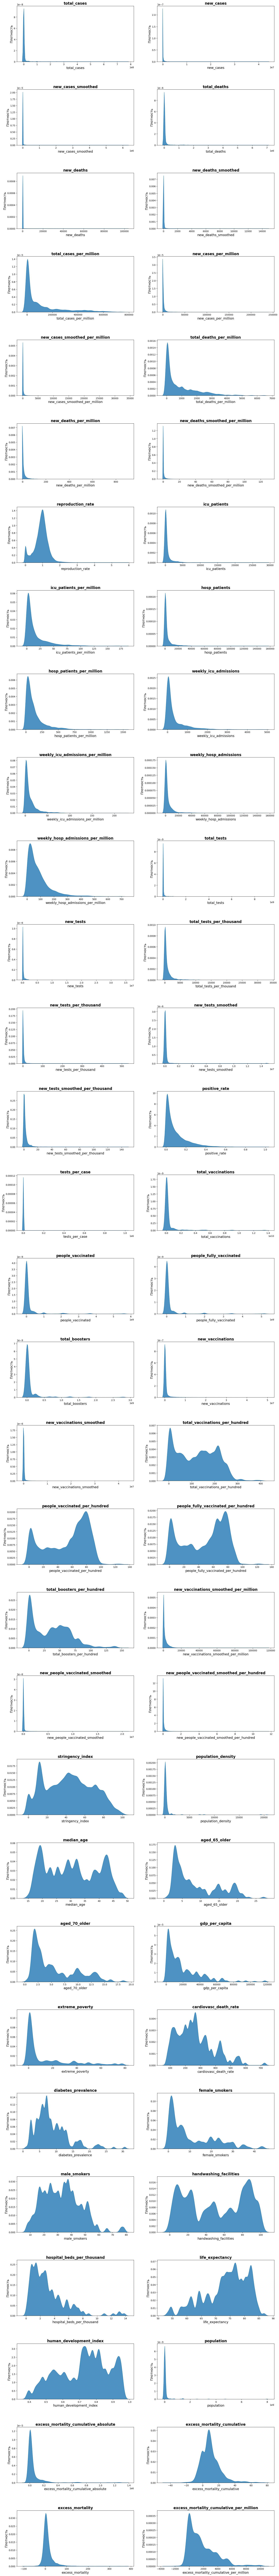

In [13]:
# Создаем матрицу графиков для визуализации распредления по каждой переменной
fig, axes = plt.subplots(31,2, figsize = (20,200))

# Расстояние между графиками
plt.subplots_adjust(hspace=0.5)

# Список значений признаков для цикла
columns = df.columns
# Отбираем столбы с типом floate
columns = list(columns[4:])
columns.remove(columns[29])

# Строим распределения (kdeplot) для каждого признака
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    sns.kdeplot(data = df,
                x = column,
                fill = True,
                alpha = 0.8,
                ax = ax)
    ax.set_title(column, fontweight = 'bold', fontsize = 16)
    ax.set_xlabel(column, fontsize = 14)
    ax.set_ylabel('Плотность', fontsize = 14)
    
plt.show()

По данным распределениям можно сделать следующий вывод:
    
Почти все признаки не имеют нормального распределения, в основном их значения имеют экстреум на минимальных значениях. Так же имеются признаки в которых два экстремума total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, total_boosters_per_hundred.
Так же можно увидеть распростронённое распределение в  stringency_index, median_age, male_smokers, handwashing_facilitues.

Так как распределение не нормальное в дальнейшем будем масштабировать данные, а именно нормализовывать.